In [89]:
from sympy import *

Дана функция f(x) = (sin(x)/2 + cos(x)/2)^2 * sin(x)

Определить корни

Найти интервалы, на которых функция возрастает

Найти интервалы, на которых функция убывает

Построить график

Вычислить вершину

Определить промежутки, на котором f > 0

Определить промежутки, на котором f < 0

In [90]:
x = Symbol('x')

In [91]:
y = (sin(x)/2 + cos(x)/2)**2 * sin(x)
y

(sin(x)/2 + cos(x)/2)**2*sin(x)

# Корни уравнения:

In [92]:
roots = solve(y, x)
roots

[0, -pi/4, 3*pi/4, pi]

# Экстремумы функции:

In [93]:
extremums = solve(diff(y, x), x)
extremums

[-pi/4,
 3*pi/4,
 -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2),
 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2),
 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2),
 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2)]

# Интервалы возрастания (убывания) функции:

In [94]:
def user_is_increasing(function, point_1, point_2):
    if function.evalf(subs={x: point_2}) > function.evalf(subs={x: point_1}):
        return True
    else:
        return False


def intervals(function, points):
    for i in range(1, len(points)):
        if user_is_increasing(function, points[i], points[i-1]):
            print(f'*  Функция возрастает на интервале: \nот {points[i-1]} до {points[i]}')
        else:
            print(f'*  Функция убывает на интервале: \nот {points[i-1]} до {points[i]}')


intervals(y, extremums)

*  Функция убывает на интервале: 
от -pi/4 до 3*pi/4
*  Функция возрастает на интервале: 
от 3*pi/4 до -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2)
*  Функция убывает на интервале: 
от -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2) до 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2)
*  Функция убывает на интервале: 
от 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2) до 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2)
*  Функция возрастает на интервале: 
от 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2) до 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2)


# Интервалы возрастания (убывания) функции версия 2
По идее, при прохождении экстремума, знак производной должен меняться. Но выше видно, что водряд идут два интервала убывания.
Я предполагаю, что это связано некорретной работой с числами с плавающей точкой в методе *evalf()*

Поэтому предлагаю еще один вариант определения интервалов убывания и возрастания

In [95]:
def user_is_increasing(function, point_1, point_2):
    if function.evalf(subs={x: point_2}) > function.evalf(subs={x: point_1}):
        return True
    else:
        return False
    
    
def intervals_v2(function, points):
    values = ('возрастает', 'убывает')
    if user_is_increasing(function, points[1], points[0]):
        print(f'*  Функция возрастает на интервале: \nот {points[1]} до {points[0]}')
        characteristic = 0
    else:
        print(f'*  Функция убывает на интервале: \nот {points[1]} до {points[0]}')
        characteristic = 1
    for i in range(2, len(points)):
        if characteristic == 1:
            print(f'*  Функция возрастает на интервале: \nот {points[i-1]} до {points[i]}')
            characteristic = 0
        else:
            print(f'*  Функция убывает на интервале: \nот {points[i-1]} до {points[i]}')
            characteristic = 1


intervals_v2(y, extremums)

*  Функция убывает на интервале: 
от 3*pi/4 до -pi/4
*  Функция возрастает на интервале: 
от 3*pi/4 до -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2)
*  Функция убывает на интервале: 
от -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2) до 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2)
*  Функция возрастает на интервале: 
от 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2) до 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2)
*  Функция убывает на интервале: 
от 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2) до 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2)


# График функции

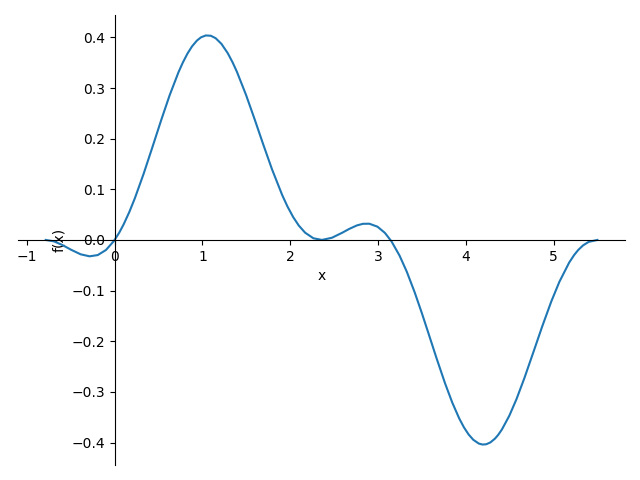

In [96]:
p = plot(y, (x, extremums[0], extremums[0] + 2*pi))

# Вершина функции

In [97]:
def highiest_point(function, points):
    function_values = []
    for point in points:
        function_values.append(function.evalf(subs={x:point}))
    values_dict = dict(zip(function_values, points))
    result = (values_dict.get(max(values_dict.keys())), max(values_dict.keys()))
    print(f'Вершина функции имеет координаты: \nx = {result[0]} \nу = {result[1]}')
    

highiest_point(y, extremums)                           

Вершина функции имеет координаты: 
x = 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2) 
у = 0.404106232073136


# Промежутки f(x)>0 и f(x)<0

In [102]:
print('Функция положительна на промежутках:')
solve_univariate_inequality(y >= 0, x)

Функция положительна на промежутках:


Eq(x, 7*pi/4) | ((0 <= x) & (x <= pi))

In [103]:
print('Функция отрицательна на промежутках:')
solve_univariate_inequality(y <= 0, x)

Функция отрицательна на промежутках:


Eq(x, 0) | Eq(x, 3*pi/4) | ((pi <= x) & (x < 2*pi))